## 손실함수
- 손실 함수는 모델이 얼마나 잘못 예측하는지를 측정하는 함수로, 모델의 성능을 최적화하기 위해 최소화해야 하는 값
- 손실 함수를 최소화하기 위해 경사하강법(Gradient Descent)와 같은 최적화 알고리즘을 이용

## 경사하강법 실습

Text(0, 0.5, 'y')

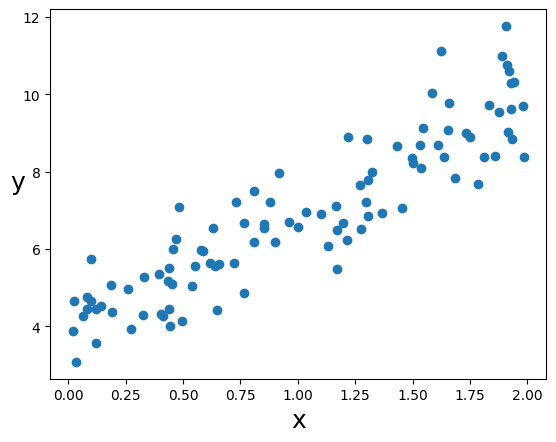

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

plt.scatter(X,y)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)

In [2]:
W = np.random.randn(1)
b = np.random.randn(1)
print(W, b)

[0.7273225] [-0.94091903]


Text(0, 0.5, 'y')

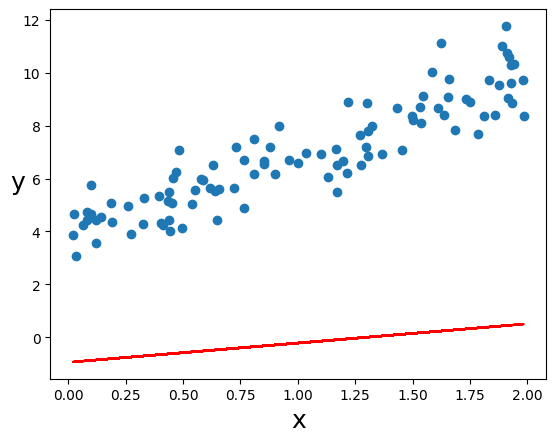

In [3]:
y_pred = W * X + b
plt.plot(X,y_pred,'r')
plt.scatter(X,y)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)

In [4]:
def MSE(y, y_pred):
    m = len(y)
    cost = (1/m) * np.sum(np.square(y_pred-y))
    
    return cost
    
print(MSE(y, y_pred))

53.00519300897772


In [5]:
y_preds = []
epsilon = 0.03
learning_rate = 0.01

for epoch in range(1000):
    # 예측값 계산
    y_pred = W * X + b
    y_preds.append(y_pred)
    # MSE 계산
    mse = np.mean((y_pred - y)**2)
    
    if mse < epsilon:
        print("Reached MSE below 0.03")
        break
    
    # w와 b 업데이트
    w_gradient = (2/len(X)) * np.dot(X.T, (y_pred - y)).sum()
    b_gradient = (2/len(X)) * np.sum(y_pred - y)
    W -= learning_rate * w_gradient
    b -= learning_rate * b_gradient

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, MSE: {mse:.4f}')

print(f'Final Parameters: w={W[0]:.4f}, b={b[0]:.4f}')

Epoch: 0, MSE: 53.0052
Epoch: 100, MSE: 1.1796
Epoch: 200, MSE: 0.9469
Epoch: 300, MSE: 0.8321
Epoch: 400, MSE: 0.7740
Epoch: 500, MSE: 0.7447
Epoch: 600, MSE: 0.7298
Epoch: 700, MSE: 0.7223
Epoch: 800, MSE: 0.7185
Epoch: 900, MSE: 0.7166
Final Parameters: w=3.0180, b=3.8367


In [6]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

W = np.random.randn(1)
b = np.random.randn(1)

print(W, b)

y_pred = W * X + b

print(X.T.shape, (y_pred - y).shape)

np.dot(X.T, (y_pred - y)), np.dot(X.T, (y_pred - y)).sum()

[0.5491704] [0.98080801]
(1, 100) (100, 1)


(array([[-526.71475286]]), np.float64(-526.7147528567709))

Text(0, 0.5, 'y')

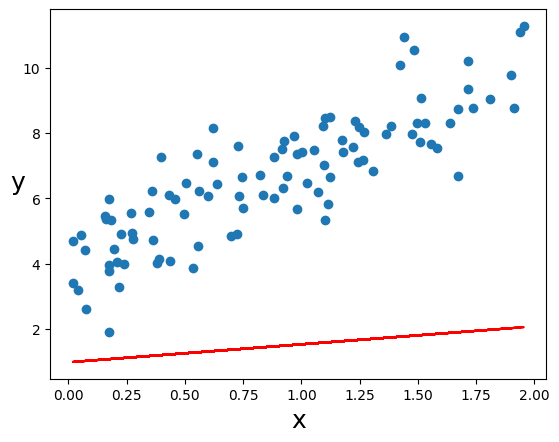

In [7]:
y_pred = W * X + b
plt.plot(X,y_pred,'r-')
plt.scatter(X,y)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)

In [8]:
def gradient_descent(epochs, epsilon, learning_rate):
    y_preds = []
    W = np.random.randn(1)
    b = np.random.randn(1)
    print(f"Initial Function  >>>  y={W}x+{b}")
    for epoch in range(epochs):
        # 예측값 계산
        y_pred = W * X + b
        y_preds.append(y_pred)
        # MSE 계산
        mse = np.mean((y_pred - y)**2)
        
        if mse < epsilon:
            print("Reached MSE below 0.03")
            break
        
        # w와 b 업데이트
        w_gradient = (2/len(X)) * np.dot(X.T, (y_pred - y)).sum()
        b_gradient = (2/len(X)) * np.sum(y_pred - y)
        W -= learning_rate * w_gradient
        b -= learning_rate * b_gradient

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}, MSE: {mse:.4f}')

    print(f'Final Parameters: w={W[0]:.4f}, b={b[0]:.4f}')
    
    return y_preds

## 학습률(Learning Rate) 알파
- 각 반복(iteration)마다 매개변수(또는 가중치)를 업데이트할 때 사용하는 스텝 크기

1) **학습률이 너무 작은 경우**:
    - 학습이 매우 느리게 진행되어 많은 반복이 필요합니다.
    - 시간이 많이 걸리며, 최적의 매개변수에 수렴하는 데 오랜 시간이 걸릴 수 있습니다.
    - 국소 최적값(local optimum)에 갇힐 가능성이 있습니다.
2) **학습률이 너무 큰 경우**:
    - 매개변수가 최적값을 지나쳐서 발산할 수 있습니다.
    - 학습이 불안정하게 진행되며, 손실 함수 값이 발산하거나 진동할 수 있습니다.
    - 최적의 매개변수에 도달하지 못할 가능성이 높습니다.

Initial Function  >>>  y=[1.27495006]x+[1.10421496]
Epoch: 0, MSE: 21.4971
Epoch: 100, MSE: 1.0998
Epoch: 200, MSE: 1.0631
Epoch: 300, MSE: 1.0480
Epoch: 400, MSE: 1.0399
Epoch: 500, MSE: 1.0355
Epoch: 600, MSE: 1.0332
Epoch: 700, MSE: 1.0319
Epoch: 800, MSE: 1.0312
Epoch: 900, MSE: 1.0308
Final Parameters: w=3.0584, b=3.9613


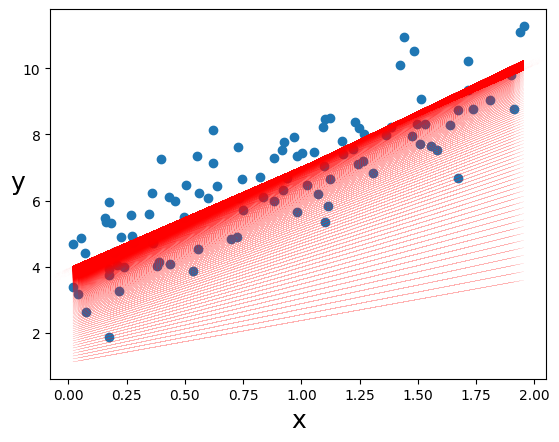

In [9]:
y_preds = gradient_descent(1000, 0.3, 0.01)

plt.figure()
plt.scatter(X, y)
for index, y_pred in enumerate(y_preds):
    plt.plot(X, y_pred, 'r-', alpha = 0.3 + (0.7/len(y_preds))*index, linewidth=0.1)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.show()

## 경사하강법을 이용한 회귀 - SGDRegressor

In [11]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# 데이터 생성 (임의의 선형 데이터)
np.random.seed(42)
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

# SGDRegressor 모델 생성 및 학습
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    max_iter=1000,      # 최대 반복 횟수. 경사하강법의 최대 반복 횟수를 설정. 지정된 반복 횟수까지 수렴하지 않으면 학습을 중단.
    tol=0.001,          # 수렴 허용 오차. 비용 함수의 변화가 이 값보다 작아지면 학습을 멈춤.
    penalty=None,       # 규제(정규화) 유형. 'l2', 'l1', 'elasticnet' 등의 값을 가질 수 있으며, None은 규제를 사용하지 않음을 의미.
    eta0=0.1,           # 초기 학습률.
    random_state=42     # 랜덤 시드.
)

sgd_reg.fit(X, y.ravel())

# 예측 및 성능 평가
y_train_pred = sgd_reg.predict(X)

train_mse = mean_squared_error(y, y_train_pred)

# 모델 파라미터 출력
print(f"가중치: {sgd_reg.coef_}")
print(f"절편: {sgd_reg.intercept_}")
print(f"훈련 세트 MSE: {train_mse}")

가중치: [2.8250878]
절편: [4.24365286]
훈련 세트 MSE: 0.8140841871689319
